# Experiment 1: Results of copying algorithms in dimension 2 with LNN copies

In this notebook, we show results corresponding to Experiment 1, described in the thesis report. Specifically, we present the fidelities and accuracies of the Large Neural Network copies (LNN) trained with Algorithms 1 and 2 in the two-dimensional datasets, for each of the 3 different black box models considered in the experiment, comparing them to the corresponding metrics achieved by the LNN hard copies. In addition, we show plots that describe the evolution of these metrics across different training dataset sizes, where computations were limited to 1,000,000 synthetic samples and 240 seconds.

As a remark, this particular notebook corresponds to the execution with seed 42. Nevertheless, the line plots that appear below have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase their reliability and significance.

In [1]:
# All necessary imports
import numpy as np
import os
import types
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Overlapping Gaussians dataset

### Black box 1: Random Forest classifier

In [3]:
# Load the data
with open("../results/results_DS1_1_3_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.935


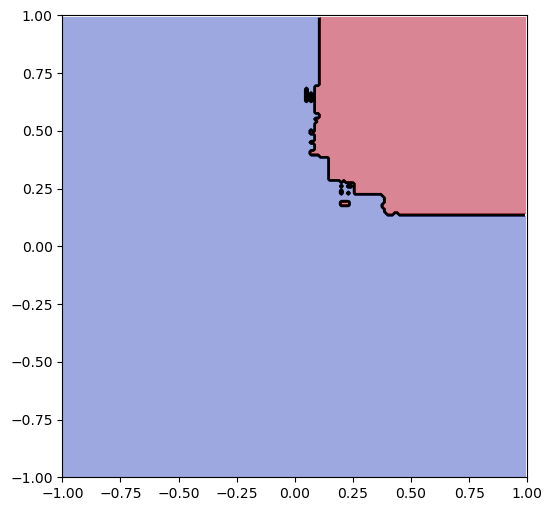

In [4]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.007195


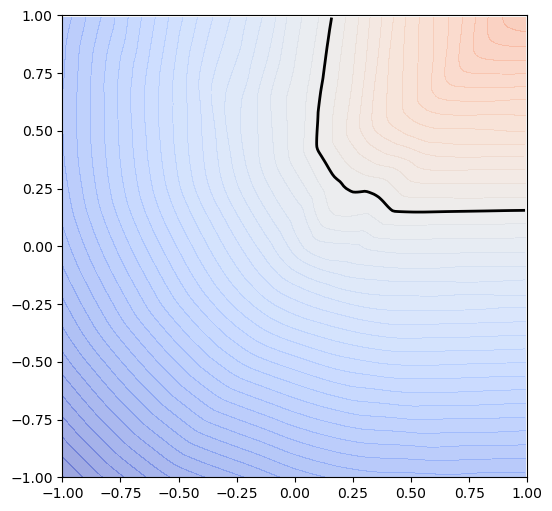

In [5]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.003387


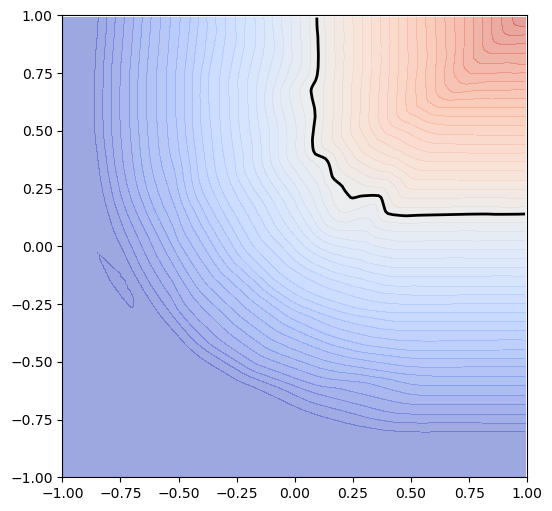

In [6]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.003013


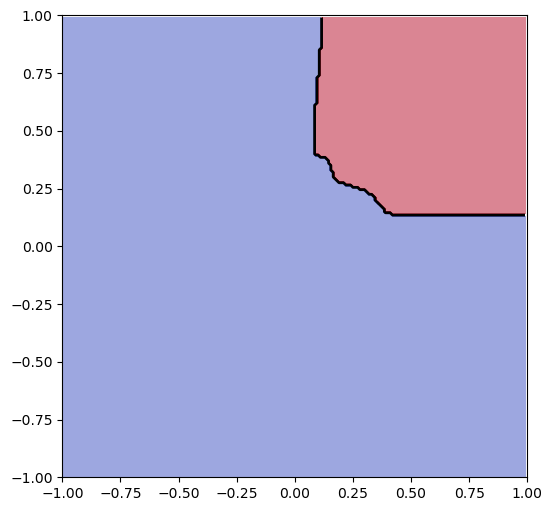

In [7]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

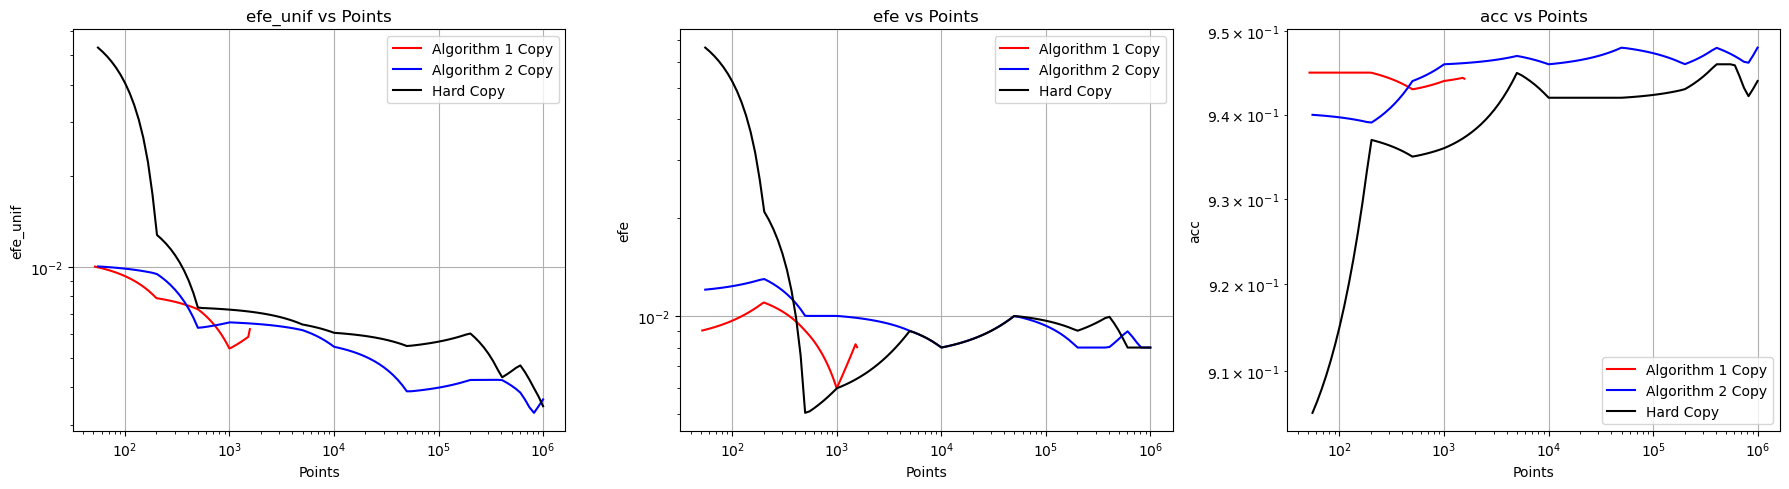

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9450   0.0032 0.0090   0.0020      0.0062        0.0009    1733.4000  86.9749
 Model 2 0.9480   0.0040 0.0080   0.0024      0.0036        0.0007 1000000.0000   0.0000
 Model 3 0.9440   0.0020 0.0080   0.0040      0.0035        0.0006 1000000.0000   0.0000
Blackbox 0.9400   0.0045                                                                


In [8]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_1_3_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [9]:
# Load the data
with open("../results/results_DS1_2_3_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.93


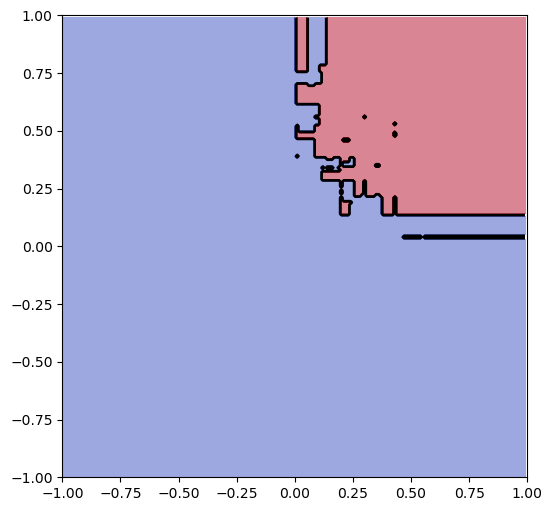

In [10]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.035
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.01695


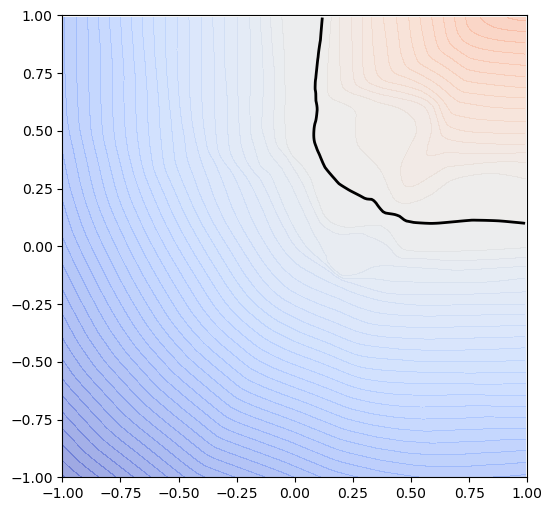

In [11]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.006584


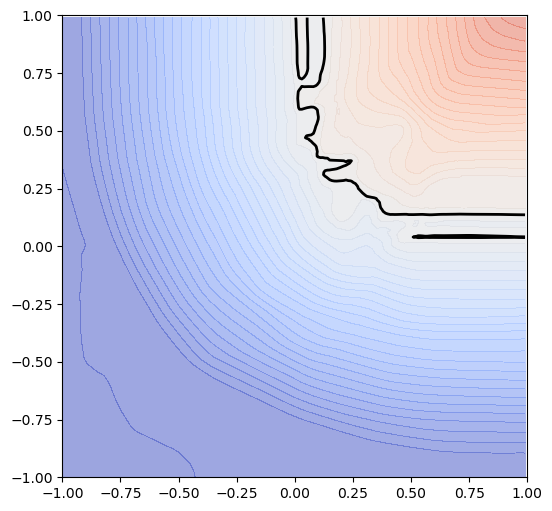

In [12]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.006793


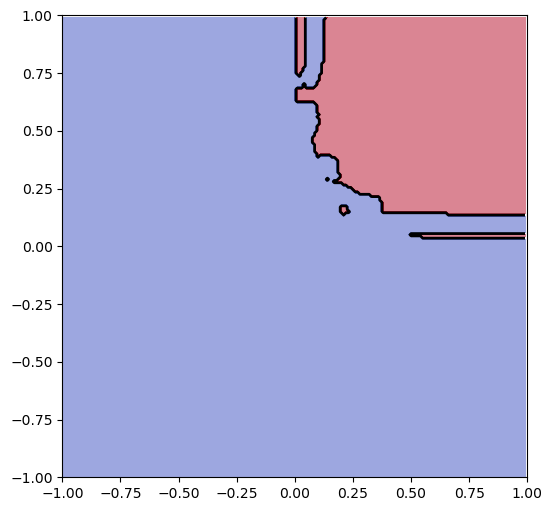

In [13]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

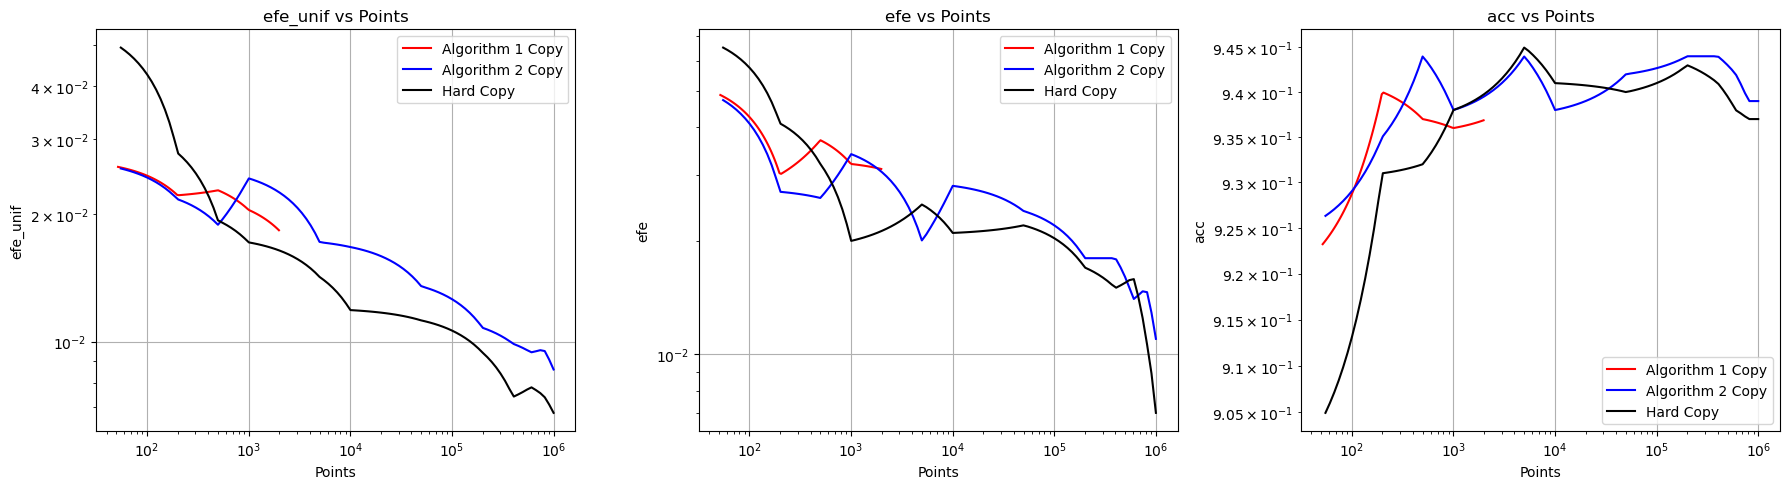

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9370   0.0068 0.0310   0.0037      0.0181        0.0012    2023.4000  29.6554
 Model 2 0.9390   0.0049 0.0110   0.0020      0.0086        0.0012 1000000.0000   0.0000
 Model 3 0.9370   0.0024 0.0070   0.0024      0.0068        0.0006 1000000.0000   0.0000
Blackbox 0.9300   0.0000                                                                


In [14]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_2_3_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [15]:
# Load the data
with open("../results/results_DS1_3_3_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.94


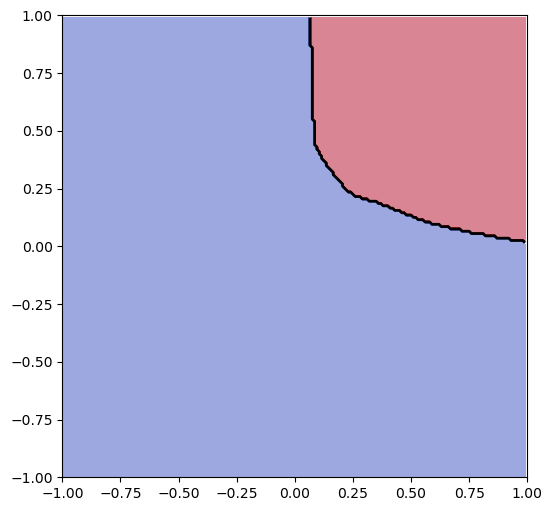

In [16]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.001257


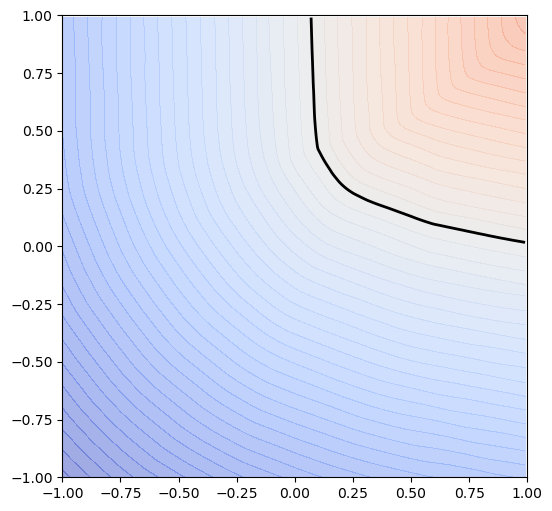

In [17]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.005
The accuracy over the test dataset is: 0.935
The empirical fidelity error over a big synthetic and uniform dataset is: 0.001116


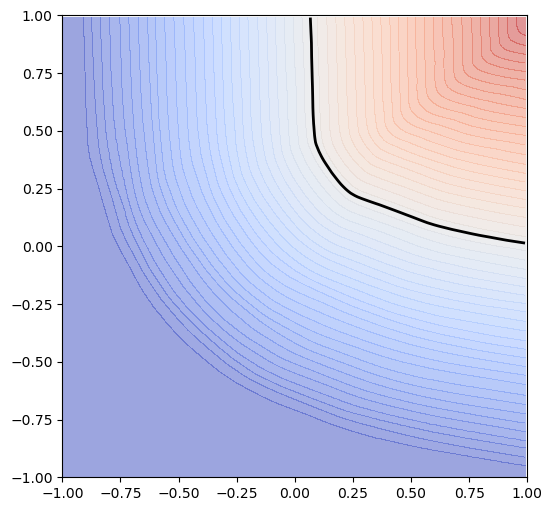

In [18]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.002003


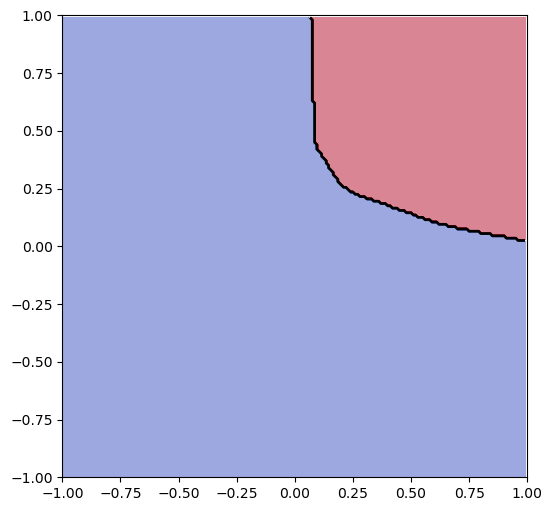

In [19]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

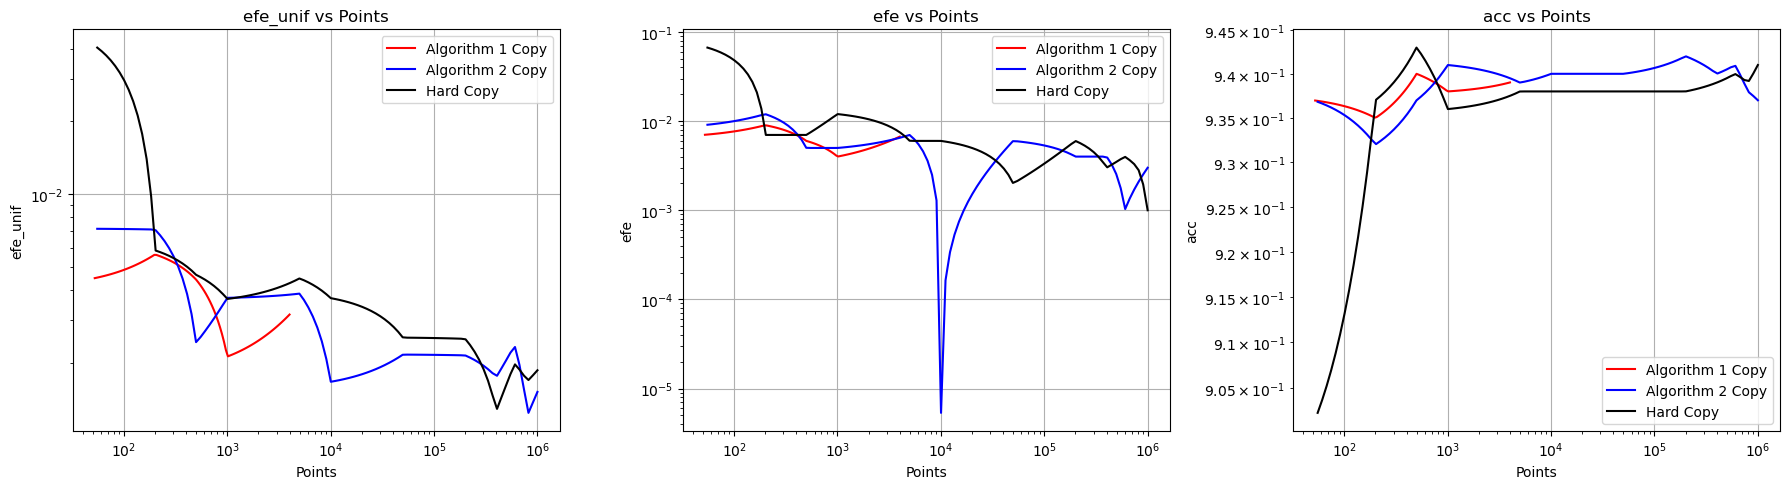

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9390   0.0058 0.0070   0.0093      0.0033        0.0040    4164.8000  92.5708
 Model 2 0.9370   0.0051 0.0030   0.0040      0.0015        0.0008 1000000.0000   0.0000
 Model 3 0.9410   0.0020 0.0010   0.0020      0.0019        0.0013 1000000.0000   0.0000
Blackbox 0.9400   0.0032                                                                


In [20]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_3_3_seed")
print(summary_df.to_string(index=False))

## Two spirals dataset

### Black box 1: Random Forest classifier

In [21]:
# Load the data
with open("../results/results_DS2_1_3_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.99


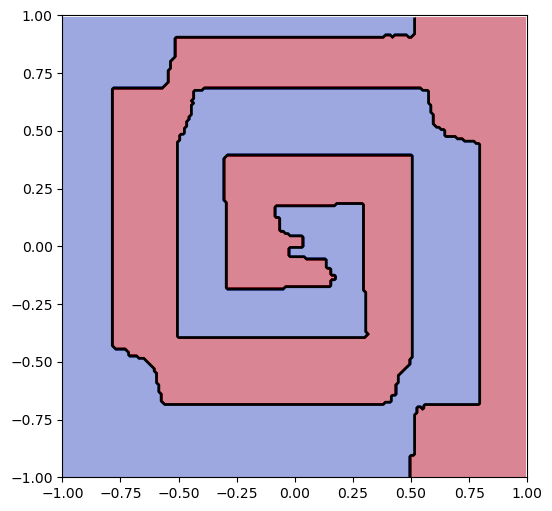

In [22]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.0185
The accuracy over the test dataset is: 0.9835
The empirical fidelity error over a big synthetic and uniform dataset is: 0.029221


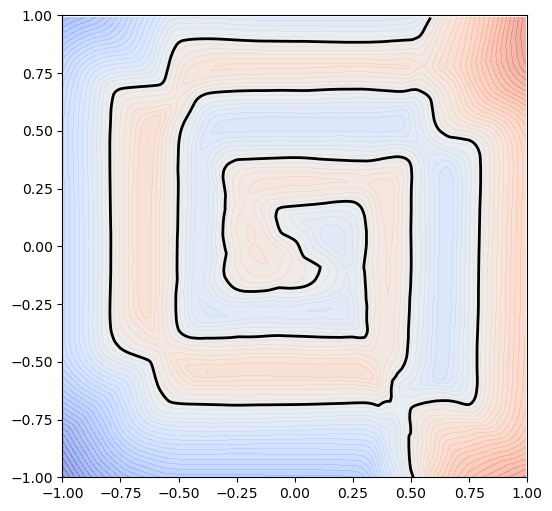

In [23]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0065
The accuracy over the test dataset is: 0.9935
The empirical fidelity error over a big synthetic and uniform dataset is: 0.010861


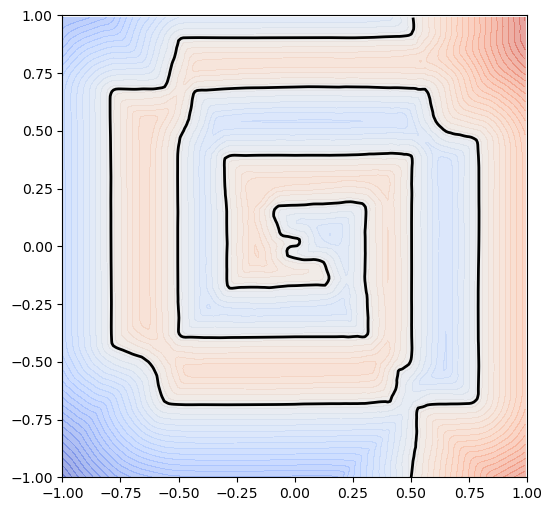

In [24]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.007
The accuracy over the test dataset is: 0.987
The empirical fidelity error over a big synthetic and uniform dataset is: 0.023382


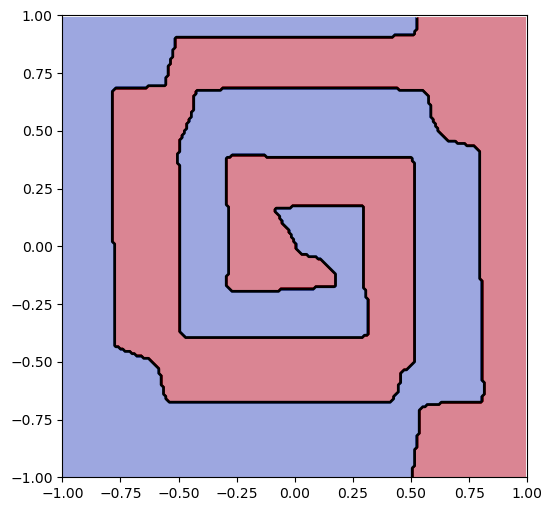

In [25]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

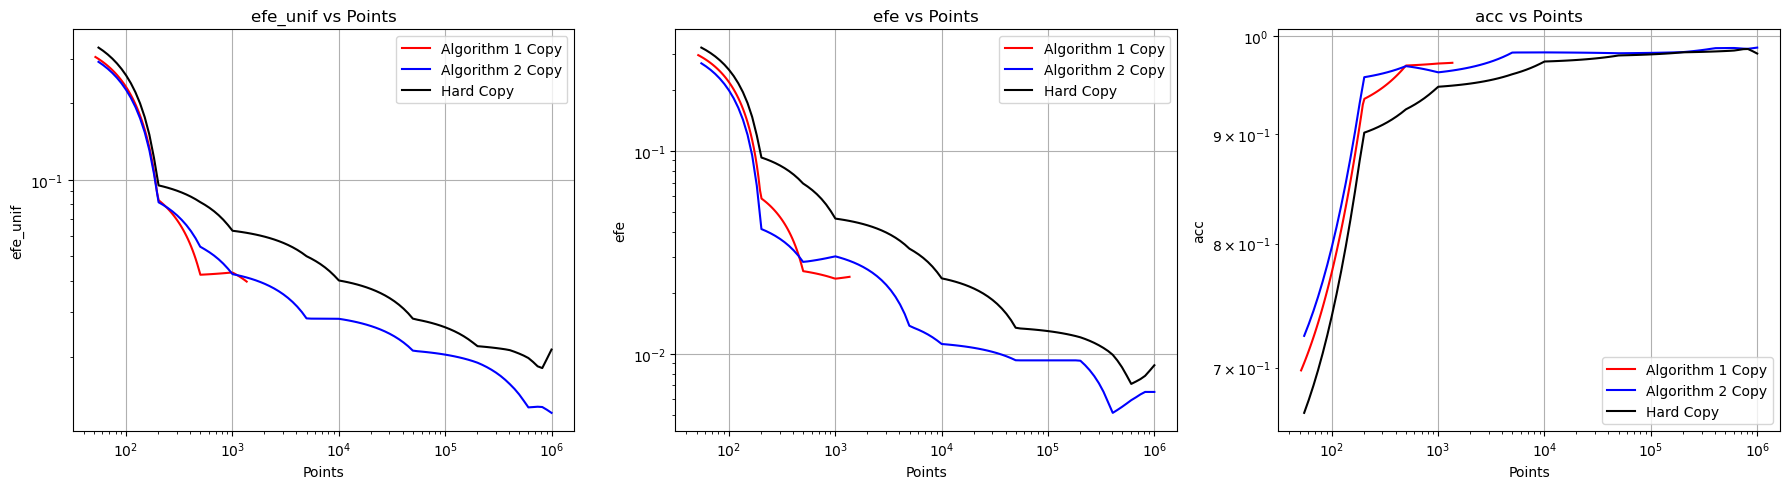

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9725   0.0084 0.0236   0.0040      0.0386        0.0058    1418.0000  30.4828
 Model 2 0.9880   0.0080 0.0065   0.0019      0.0120        0.0014 1000000.0000   0.0000
 Model 3 0.9817   0.0104 0.0088   0.0052      0.0214        0.0042 1000000.0000   0.0000
Blackbox 0.9875   0.0042                                                                


In [26]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_1_3_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [27]:
# Load the data
with open("../results/results_DS2_2_3_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.9965


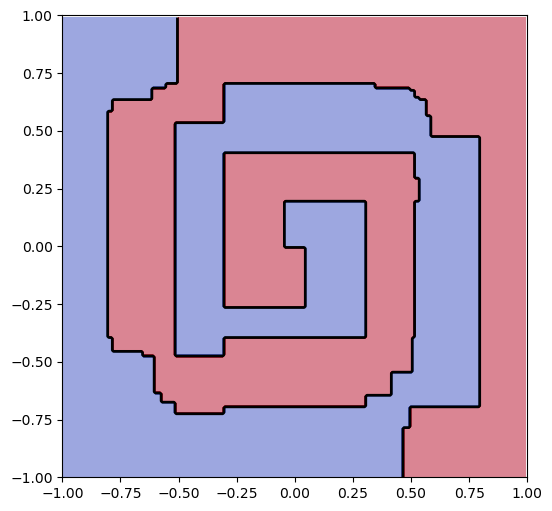

In [28]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.003
The accuracy over the test dataset is: 0.9945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.022143


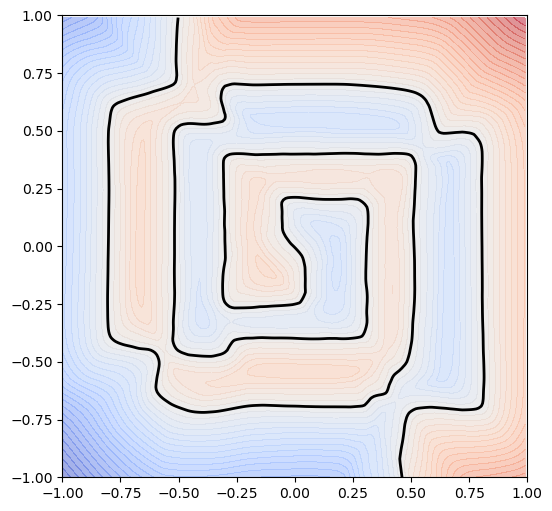

In [29]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.003
The accuracy over the test dataset is: 0.9965
The empirical fidelity error over a big synthetic and uniform dataset is: 0.013266


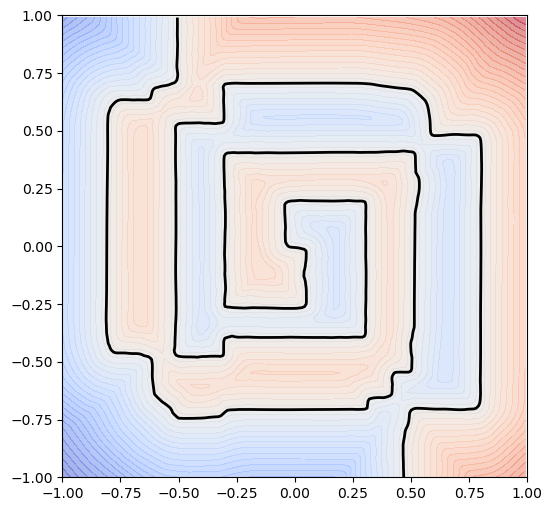

In [30]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.005
The accuracy over the test dataset is: 0.9935
The empirical fidelity error over a big synthetic and uniform dataset is: 0.01474


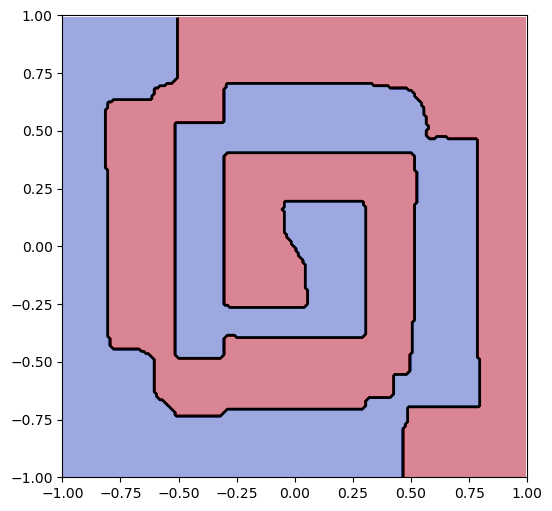

In [31]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

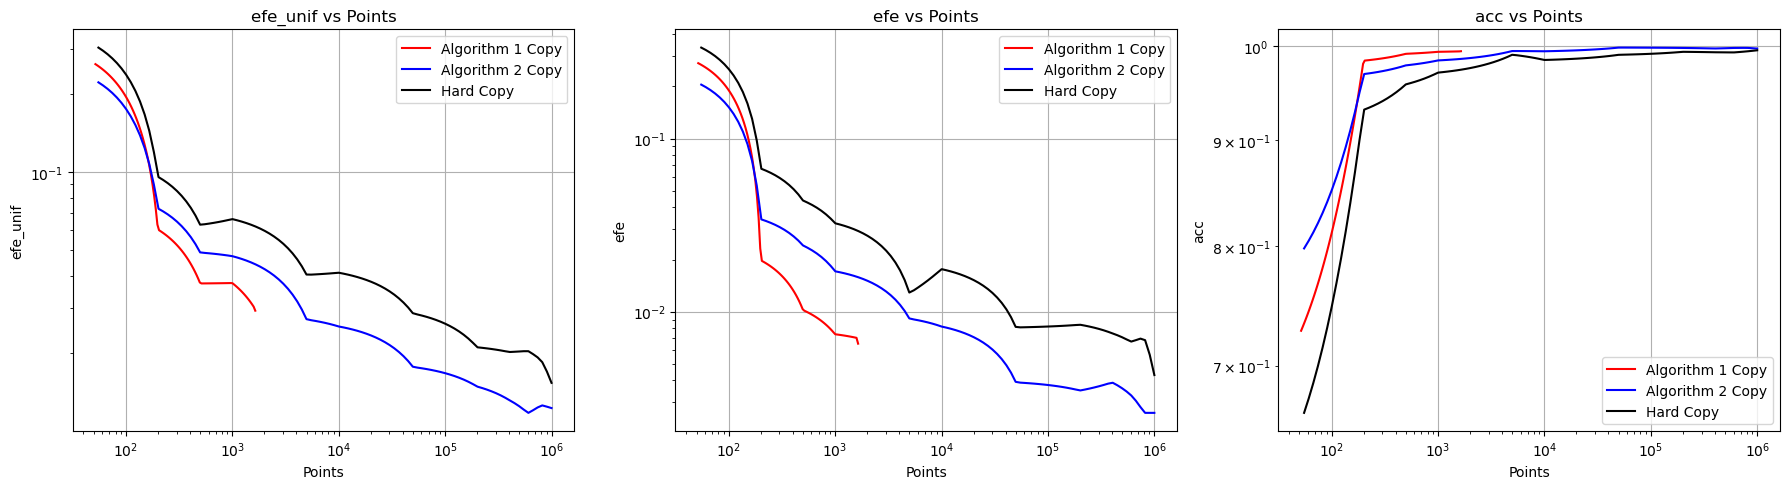

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9943   0.0017 0.0068   0.0029      0.0287        0.0044    1728.4000  46.2627
 Model 2 0.9971   0.0007 0.0026   0.0012      0.0123        0.0020 1000000.0000   0.0000
 Model 3 0.9952   0.0012 0.0043   0.0009      0.0154        0.0035 1000000.0000   0.0000
Blackbox 0.9965   0.0000                                                                


In [32]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_2_3_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [33]:
# Load the data
with open("../results/results_DS2_3_3_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 1.0


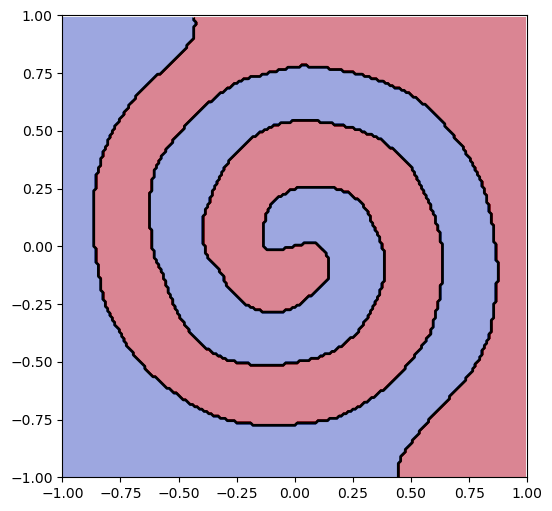

In [34]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.024583


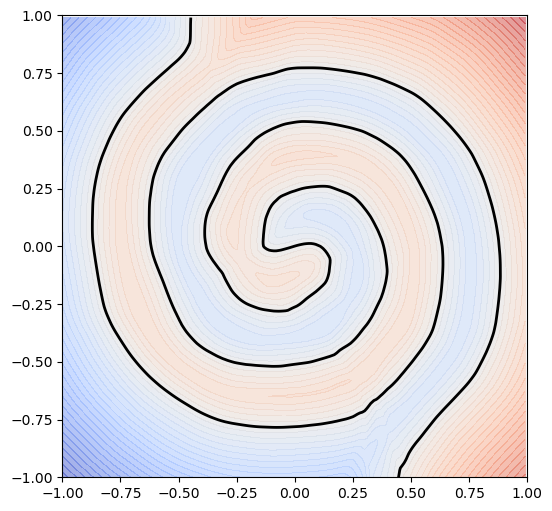

In [35]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.007688


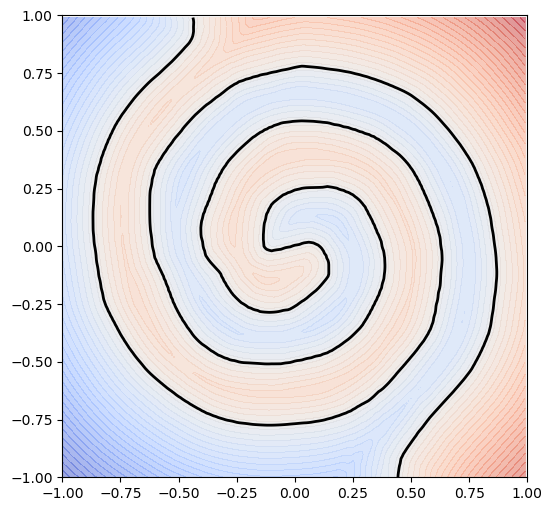

In [36]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.014937


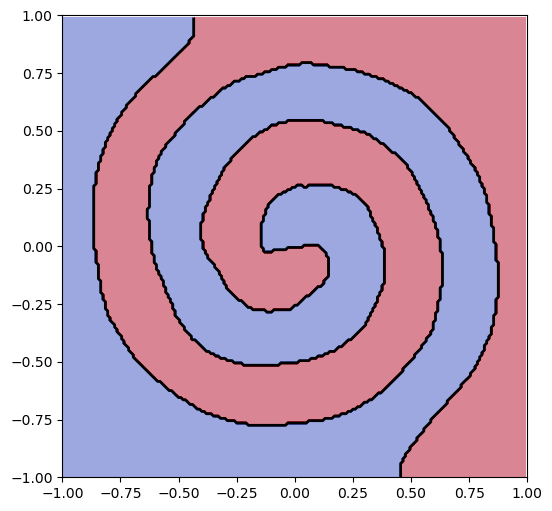

In [37]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

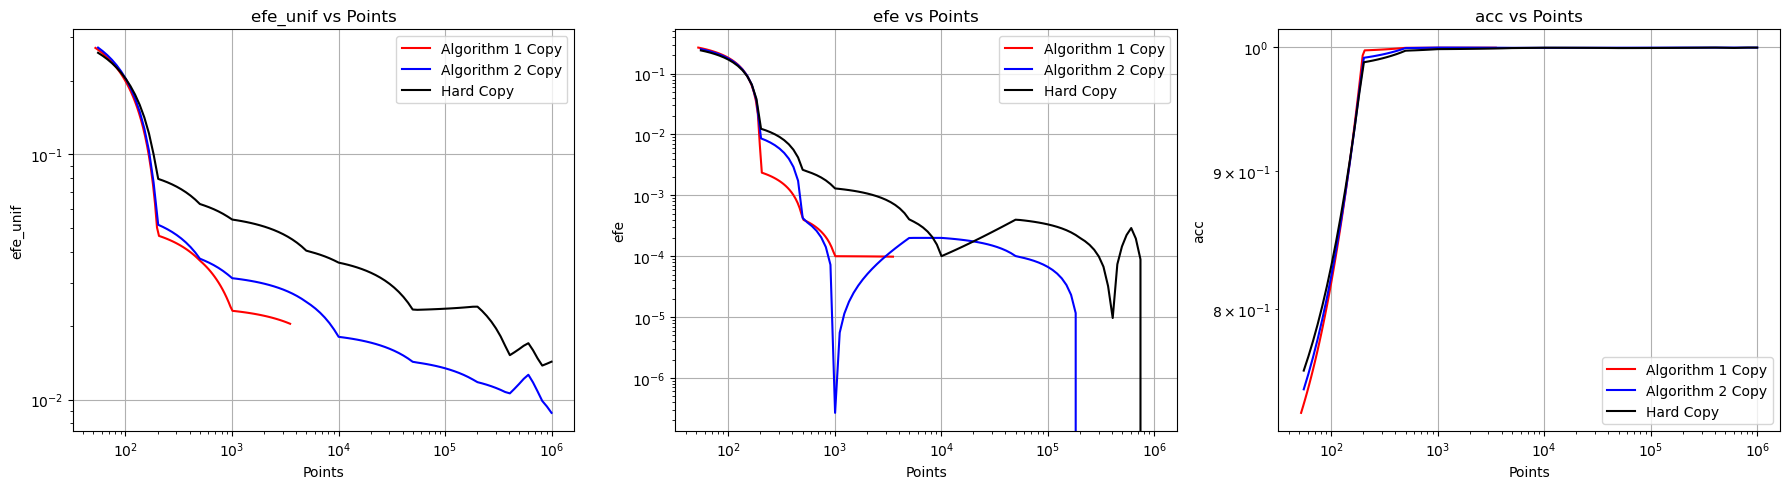

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9998   0.0004 0.0001   0.0002      0.0202        0.0036    3694.2000 110.2713
 Model 2 0.9999   0.0002 0.0000   0.0000      0.0088        0.0017 1000000.0000   0.0000
 Model 3 0.9999   0.0002 0.0000   0.0000      0.0143        0.0010 1000000.0000   0.0000
Blackbox 0.9999   0.0002                                                                


In [38]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_3_3_seed")
print(summary_df.to_string(index=False))

## Space-filling and convoluted dataset

### Black box 1: Random Forest classifier

In [39]:
# Load the data
with open("../results/results_DS3_1_3_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.8725


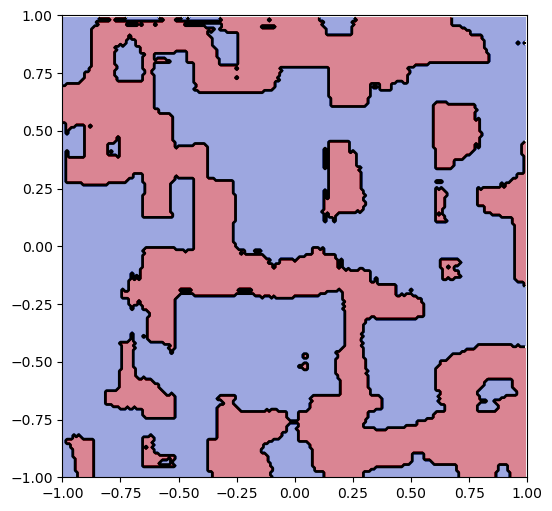

In [40]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.0955
The accuracy over the test dataset is: 0.812
The empirical fidelity error over a big synthetic and uniform dataset is: 0.105282


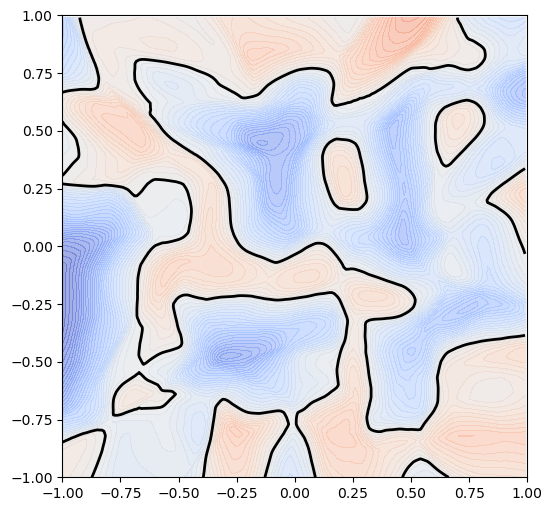

In [41]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0445
The accuracy over the test dataset is: 0.862
The empirical fidelity error over a big synthetic and uniform dataset is: 0.039731


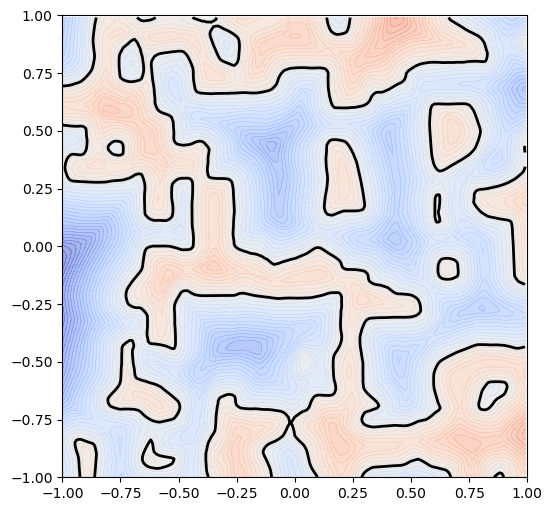

In [42]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.039
The accuracy over the test dataset is: 0.8675
The empirical fidelity error over a big synthetic and uniform dataset is: 0.040656


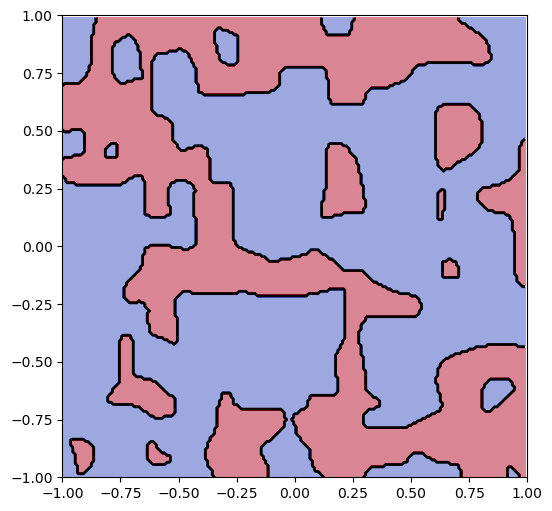

In [43]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

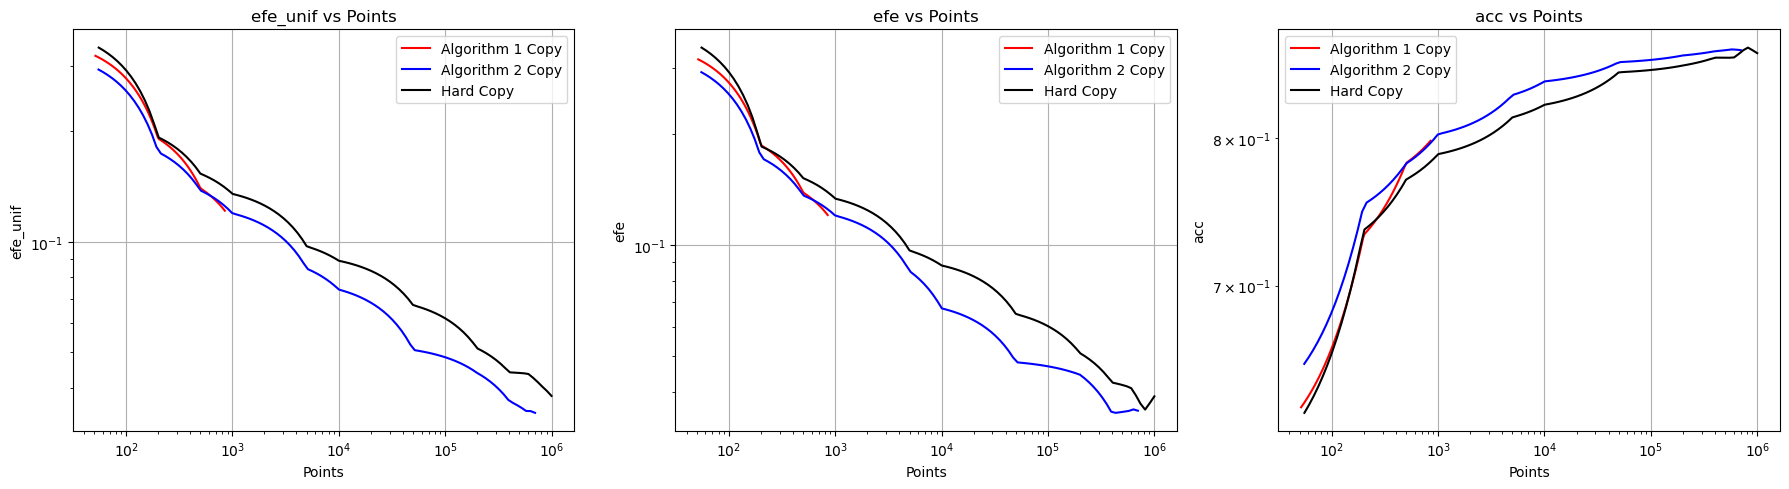

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.8016   0.0132 0.1165   0.0127      0.1174        0.0111     901.8000    35.2500
 Model 2 0.8651   0.0024 0.0366   0.0052      0.0348        0.0036  725450.0000 22376.8295
 Model 3 0.8638   0.0028 0.0389   0.0036      0.0381        0.0028 1000000.0000     0.0000
Blackbox 0.8721   0.0014                                                                  


In [44]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_1_3_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [45]:
# Load the data
with open("../results/results_DS3_2_3_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.895


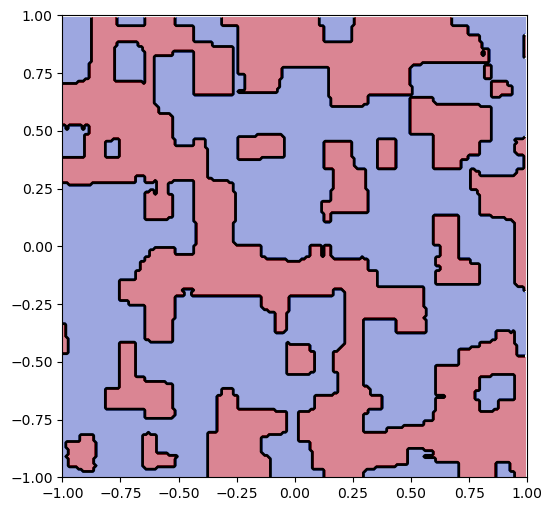

In [46]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.1125
The accuracy over the test dataset is: 0.8375
The empirical fidelity error over a big synthetic and uniform dataset is: 0.127366


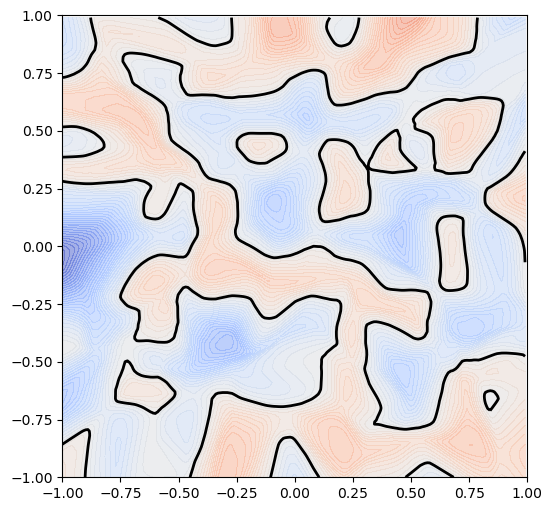

In [47]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.033
The accuracy over the test dataset is: 0.894
The empirical fidelity error over a big synthetic and uniform dataset is: 0.036389


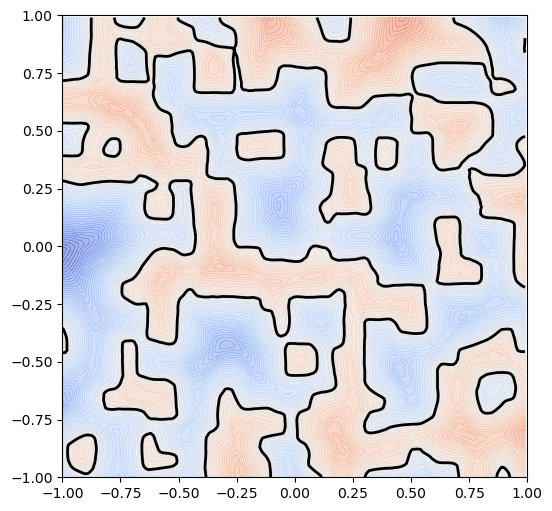

In [48]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0495
The accuracy over the test dataset is: 0.8905
The empirical fidelity error over a big synthetic and uniform dataset is: 0.04877


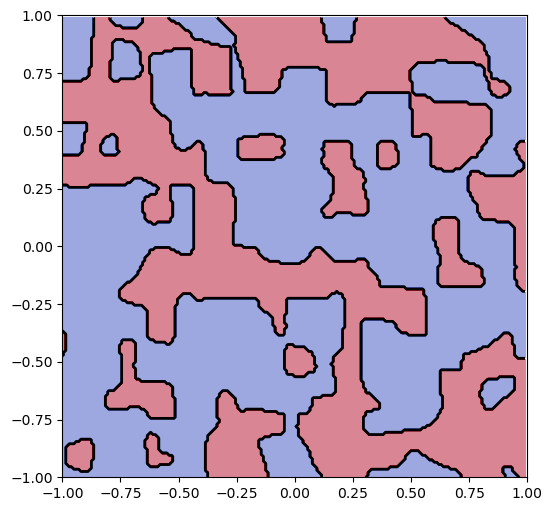

In [49]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

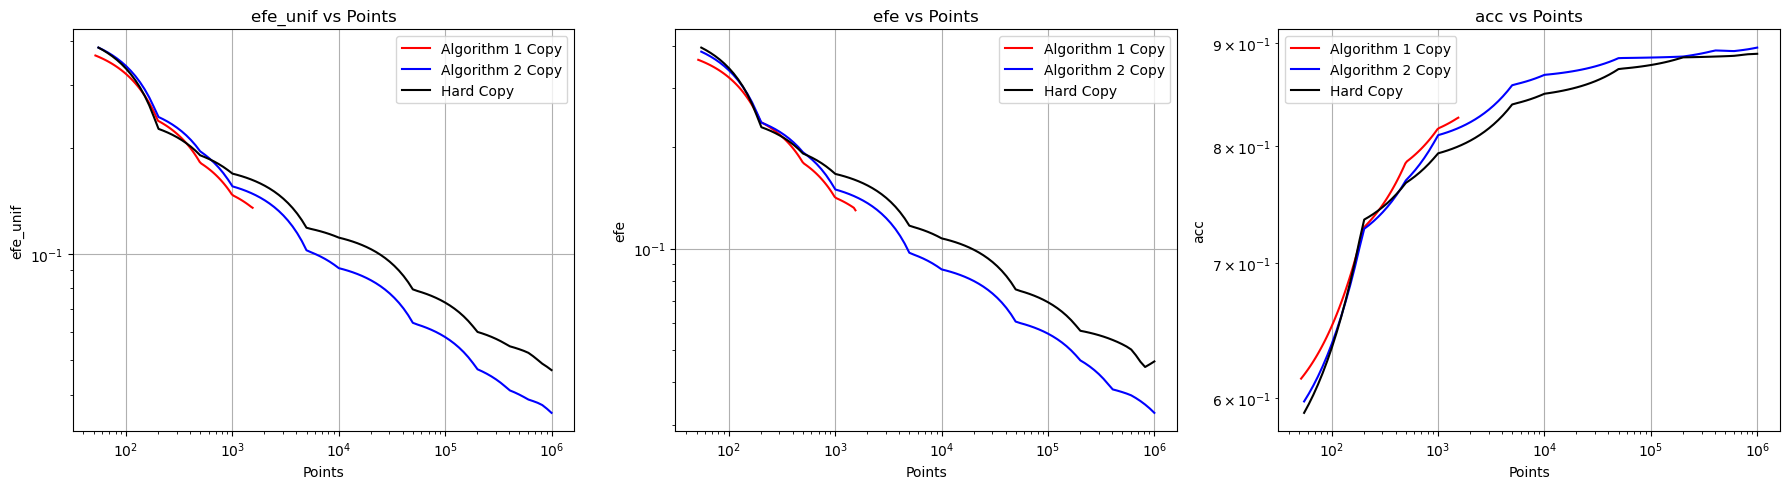

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8284   0.0066 0.1286   0.0098      0.1327        0.0040    1663.2000  60.7566
 Model 2 0.8951   0.0023 0.0325   0.0013      0.0355        0.0024 1000000.0000   0.0000
 Model 3 0.8888   0.0036 0.0462   0.0020      0.0470        0.0022 1000000.0000   0.0000
Blackbox 0.8950   0.0000                                                                


In [50]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_2_3_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [51]:
# Load the data
with open("../results/results_DS3_3_3_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.8235


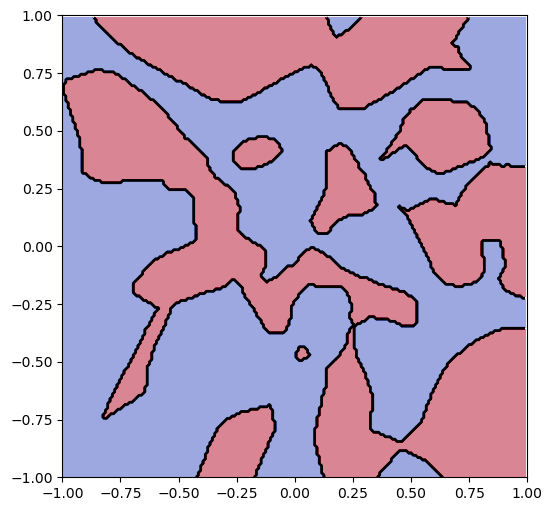

In [52]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.042
The accuracy over the test dataset is: 0.8165
The empirical fidelity error over a big synthetic and uniform dataset is: 0.041449


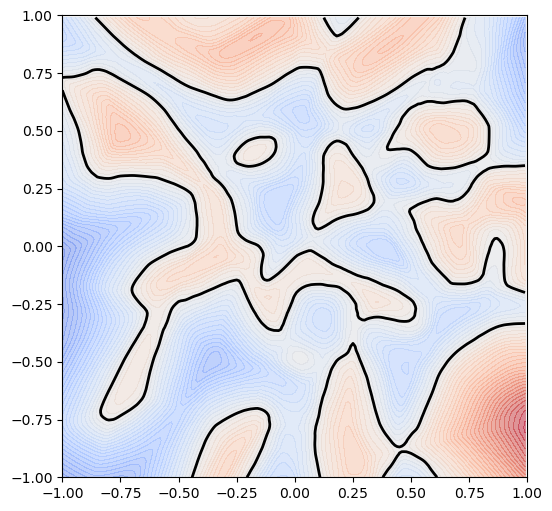

In [53]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0185
The accuracy over the test dataset is: 0.821
The empirical fidelity error over a big synthetic and uniform dataset is: 0.015139


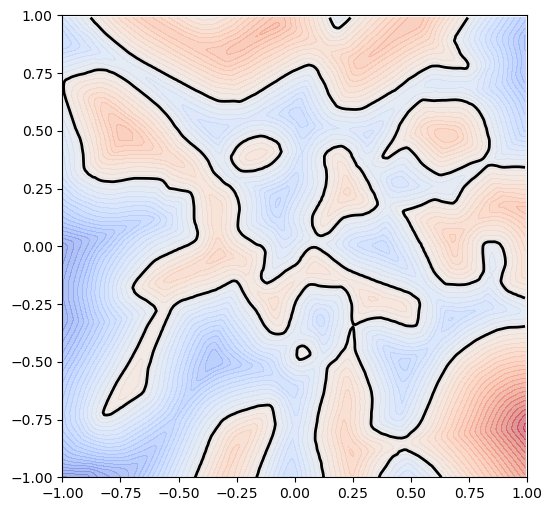

In [54]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.033
The accuracy over the test dataset is: 0.8175
The empirical fidelity error over a big synthetic and uniform dataset is: 0.027835


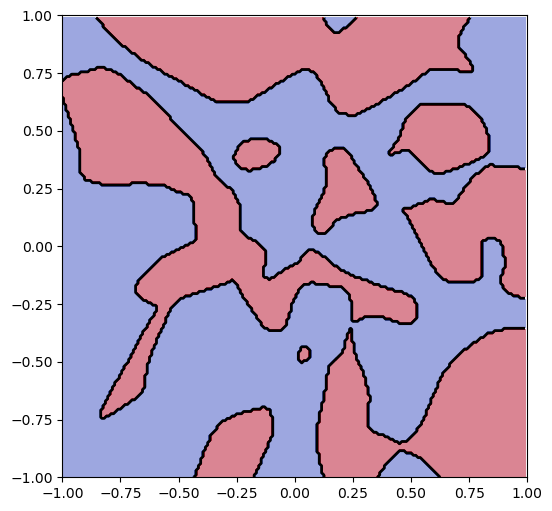

In [55]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

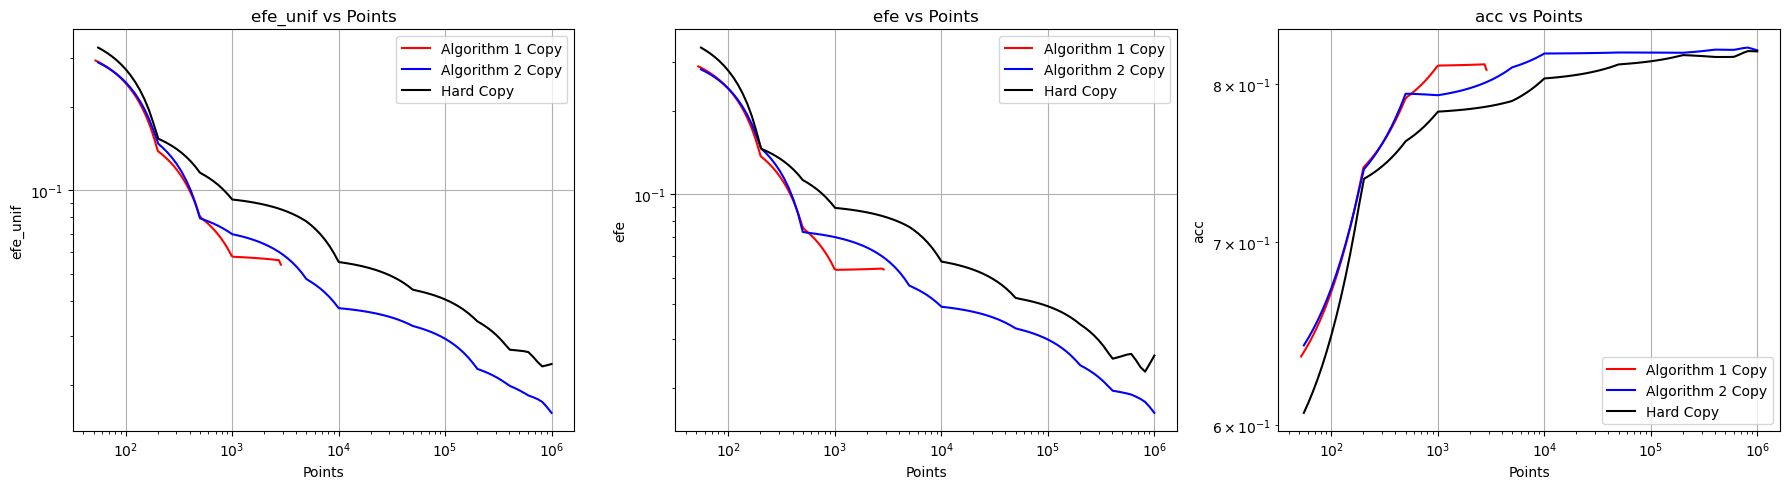

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8137   0.0096 0.0536   0.0108      0.0555        0.0130    3009.0000 106.3146
 Model 2 0.8231   0.0112 0.0162   0.0037      0.0159        0.0024 1000000.0000   0.0000
 Model 3 0.8224   0.0110 0.0261   0.0043      0.0238        0.0035 1000000.0000   0.0000
Blackbox 0.8251   0.0095                                                                


In [56]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_3_3_seed")
print(summary_df.to_string(index=False))